In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Esercizio: Comportamento Reologico di un Fluido

__Si possono dividere i fluidi in diverse categorie...__

* ...In base alla relazione tra la velocità di deformazione $\dot{\gamma}$...
* ...E lo sforzo tangenziale $\tau$

<center>
<img src="assets/fluid_types.png" width="40%"/>
</center>

## Esercizio: Comportamento Reologico di un Fluido

__In particolare, distinguiamo:__

Fluidi _Newtoniani_, per cui:

$$
\tau = a \dot{\gamma}
$$

Fluidi di _Bingham_, per cui:

$$
\tau = a \dot{\gamma} + b
$$

Fluidi _pseudoplastici_ e _dilatanti_, per cui:

$$
\tau = b \dot{\gamma}^a
$$

* Se $a > 1$ il fluido è dilatante
* Se $a < 1$ il fluido è pseudoplastico


## Esercizio: Comp. Reologico di un Fluido  

__Per determinare il tipo di un fluido possiamo:__ 

* Otterremo delle funzioni approssimanti $f$ (via minimi quadrati)
* Verificheremo il valore del SSE
* L'approssimazione con il minor SSE sarà tendenzialmente corretta

__Per due fluidi, sono stati misurati i valori di $\dot{\gamma}$ e $\tau$__

* I dati sono nei file `fluid1.csv` e `fluid2.csv` nella directory `data`
* Per leggerli potete usare `example.analyze.read_csv`

**Nella cella seguente, si proceda a leggere i due file**

* Si stampino intestazioni e dati per i due file

In [23]:
from example import analyze
import numpy as np
import os

fname1 = os.path.join('data', 'fluid1.csv')
data1, header1 = analyze.read_csv(fname1)
print(header1)
print(data1)

fname2 = os.path.join('data', 'fluid2.csv')
data2, header2 = analyze.read_csv(fname2)
print(header2)
print(data2)

['DGAMMA', 'TAU']
[[0.05    0.52   ]
 [0.26667 0.53669]
 [0.48333 0.59077]
 [0.7     0.63722]
 [0.91667 0.68756]
 [1.1333  0.70996]
 [1.35    0.77472]
 [1.5667  0.8012 ]
 [1.7833  0.85733]
 [2.      0.90652]]
['DGAMMA', 'TAU']
[[0.05     0.074605]
 [0.26667  0.22259 ]
 [0.48333  0.32176 ]
 [0.7      0.39003 ]
 [0.91667  0.47508 ]
 [1.1333   0.53293 ]
 [1.35     0.59448 ]
 [1.5667   0.67868 ]
 [1.7833   0.72823 ]
 [2.       0.78403 ]]


## Esercizio: Comp. Reologico di un Fluido

**Si disegnino i due dataset su due grafici di dispersione**

Allo scopo, si utilizza la funzione `example.analyze.scatter`

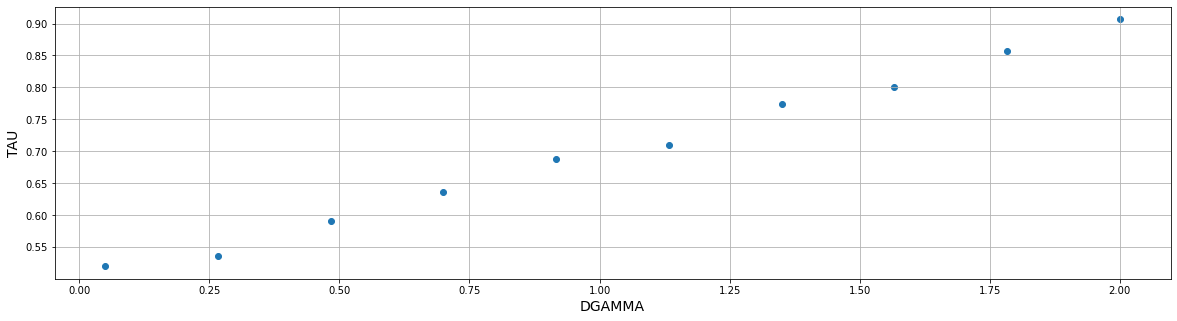

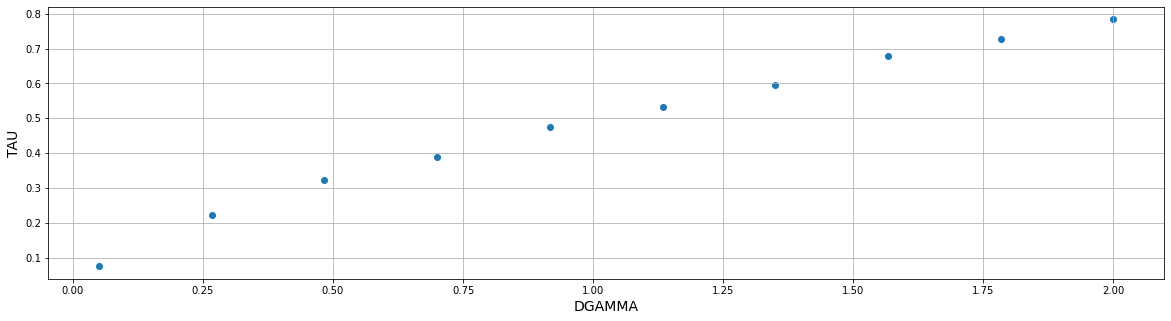

In [24]:
DGAMMA1, TAU1 = data1[:, 0], data1[:, 1]
analyze.scatter(DGAMMA1, TAU1, xlabel='DGAMMA', ylabel='TAU', figsize=(20, 5))

DGAMMA2, TAU2 = data2[:, 0], data2[:, 1]
analyze.scatter(DGAMMA2, TAU2, xlabel='DGAMMA', ylabel='TAU', figsize=(20, 5))

## Esercizio: Comp. Reologico di un Fluido

__Prima parte: verifica se il fluido sia di Bingham__

Nel modulo `sol.fluids`, definite la funzione:

```
def fit_bingham(DGAMMA, TAU):
```

Che prenda come parametri:

* Un vettore riga `DGAMMA` con i valori noti di $\dot{\gamma}$
* Un vettore riga `TAU` con i valori noti di $\tau$

La funzione deve assumere che il fluido sia di Bingham e restituire:

* I coefficienti della relazione $\tau = a \dot{\gamma} + b$
* Il valore dell'SSE

Si stampino coefficienti ed SSE per i due fluidi

In [25]:
from sol import fluids

b_a1, b_b1, b_sse1 = fluids.fit_bingham(DGAMMA1, TAU1)
print('Fluido 1, HP: Bingham')
print(f'a: {b_a1}, b: {b_b1}, sse: {b_sse1}')

b_a2, b_b2, b_sse2 = fluids.fit_bingham(DGAMMA2, TAU2)
print('Fluido 2, HP: Bingham')
print(f'a: {b_a2}, b: {b_b2}, sse: {b_sse2}')

Fluido 1, HP: Bingham
a: 0.20168482771491061, b: 0.4954706566466999, sse: 0.0008393521047255005
Fluido 2, HP: Bingham
a: 0.34629780438721086, b: 0.1252872893965221, sse: 0.008750796779161185


## Esercizio: Comp. Reologico di un Fluido

__Prima parte: verifica se il fluido sia Newtoniano__

Nel modulo `sol.fluids`, definite la funzione:

```
def fit_newton(DGAMMA, TAU):
```

Che prenda come parametri:

* Un vettore riga `DGAMMA` con i valori noti di $\dot{\gamma}$
* Un vettore riga `TAU` con i valori noti di $\tau$

La funzione deve assumere che il fluido sia Newtoniano e restituire:

* I coefficienti della relazione $\tau = a \dot{\gamma}$
* Il valore dell'SSE

Si stampino coefficienti ed SSE per i due fluidi

In [26]:
from sol import fluids

n_a1, n_sse1 = fluids.fit_newton(DGAMMA1, TAU1)
print('Fluido 1, HP: Newton')
print(f'a: {n_a1}, sse: {n_sse1}')

n_a2, n_sse2 = fluids.fit_newton(DGAMMA2, TAU2)
print('Fluido 2, HP: Newton')
print(f'a: {n_a2}, sse: {n_sse2}')

Fluido 1, HP: Newton
a: [0.55487564], sse: 0.662050578100021
Fluido 2, HP: Newton
a: [0.43560747], sse: 0.051029179563115666


## Esercizio: Comp. Reologico di un Fluido

__Seconda parte: verifica se il fluido sia pseudoplastico o dilatante__

Nel modulo `sol.fluids`, definite la funzione:

```
def fit_powerlaw(DGAMMA, TAU):
```

Che prenda come parametri:

* Un vettore riga `DGAMMA` con i valori noti di $\dot{\gamma}$
* Un vettore riga `TAU` con i valori noti di $\tau$

La funzione deve assumere che il fluido sia Newtoniano e restituire:

* I parametri della relazione $\tau = b \dot{\gamma}^a$
* Il valore dell'SSE

Si stampino coefficienti ed SSE per i due fluidi

## Esercizio: Comp. Reologico di un Fluido

__Seconda parte: verifica se il fluido sia Newtoniano__

La legge $\tau = b \dot{\gamma}^a$ è _non lineare in $a$ e $b$:

* Se ci concentriamo sul logaritmo di $\tau$, però, otteniamo:

$$
\log \tau = \log b + a \log \dot{\gamma}
$$

* Che è lineare con "colonne" $1$ e $\log \dot{\gamma}$
* Se $x_1$ e $x_0$ sono i parametri determinati con i minimi quadrati...
* ...Avremo che $x_1 = \log b$ ed $x_2 = a$

Si sfrutti questa osservazione nel codice della funzione

In [27]:
from sol import fluids

p_a1, p_b1, p_sse1 = fluids.fit_powerlaw(DGAMMA1, TAU1)
print('Fluido 1, HP: legge di potenza')
print(f'a: {p_a1}, b: {p_b1}, sse: {p_sse1}')

p_a2, p_b2, p_sse2 = fluids.fit_powerlaw(DGAMMA2, TAU2)
print('Fluido 2, HP: legge di potenza')
print(f'a: {p_a2}, b: {p_b2}, sse: {p_sse2}')

Fluido 1, HP: legge di potenza
a: 0.15320691075678872, b: 0.7270734219188487, sse: 0.0644204351862603
Fluido 2, HP: legge di potenza
a: 0.6332043677139194, b: 0.5016366108709662, sse: 0.0027867414158660063
